In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../../')
import utils

In [2]:
CALIBRATION_FILE = '../../../calibration/out/C.mat'
DATA_FILE = '../../../experiment_data/blue_feet/4/2016.10.02_21.33.08_trial_imudata.txt'

In [3]:
utils.print_header(DATA_FILE)

%  Data file recorded 2016/10/2  21:33:8
%  Stride Frequency         = [1, 1]
%  Lead In /Lead Out        = 
%  Deltas (Fractional)      = [0.25, 0.25, 0.25],[0.25, 0.25, 0.25]
%  Phase                    = 32768
%  Experiment.py 
%  Motor Gains    = [5000, 400, 200, 0, 300, 5000, 400, 200, 0, 300]



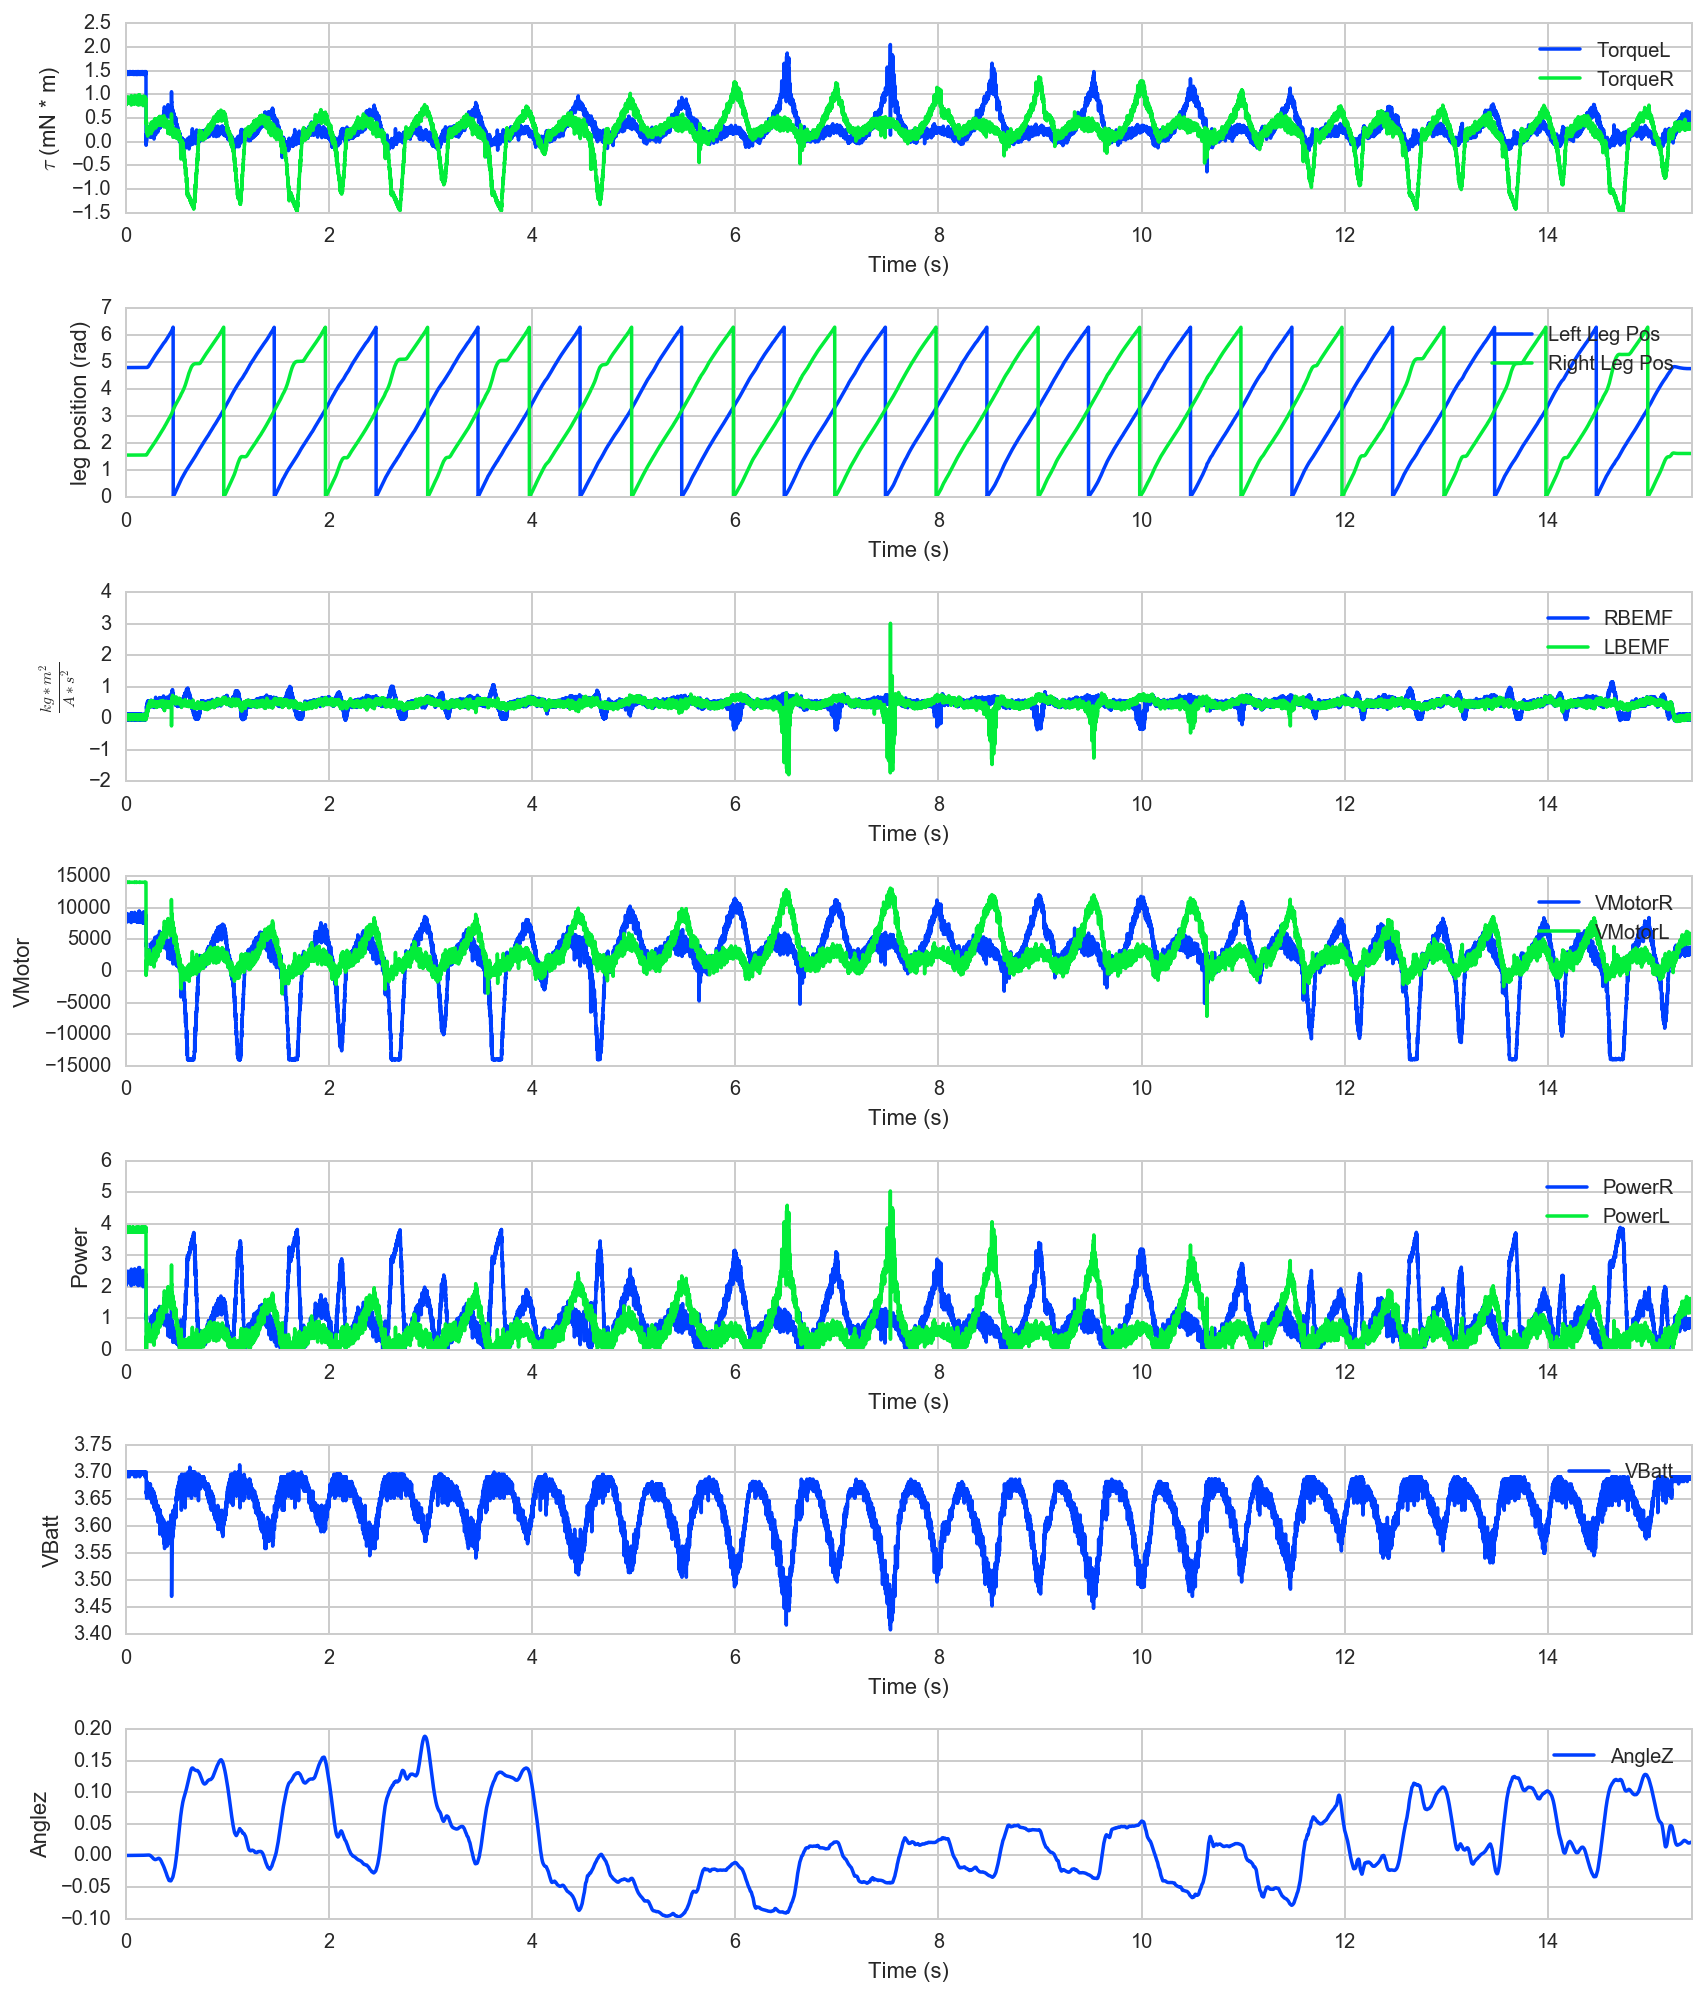

In [4]:
df = utils.process_data_files(DATA_FILE, CALIBRATION_FILE)
utils.plot_columns(df, [['TorqueL', 'TorqueR'], ['Left Leg Pos', 'Right Leg Pos'], ['RBEMF', 'LBEMF'], ['VMotorR', 'VMotorL'], ['PowerR', 'PowerL'], 'VBatt', 'AngleZ'], display=True, save_figure=False)

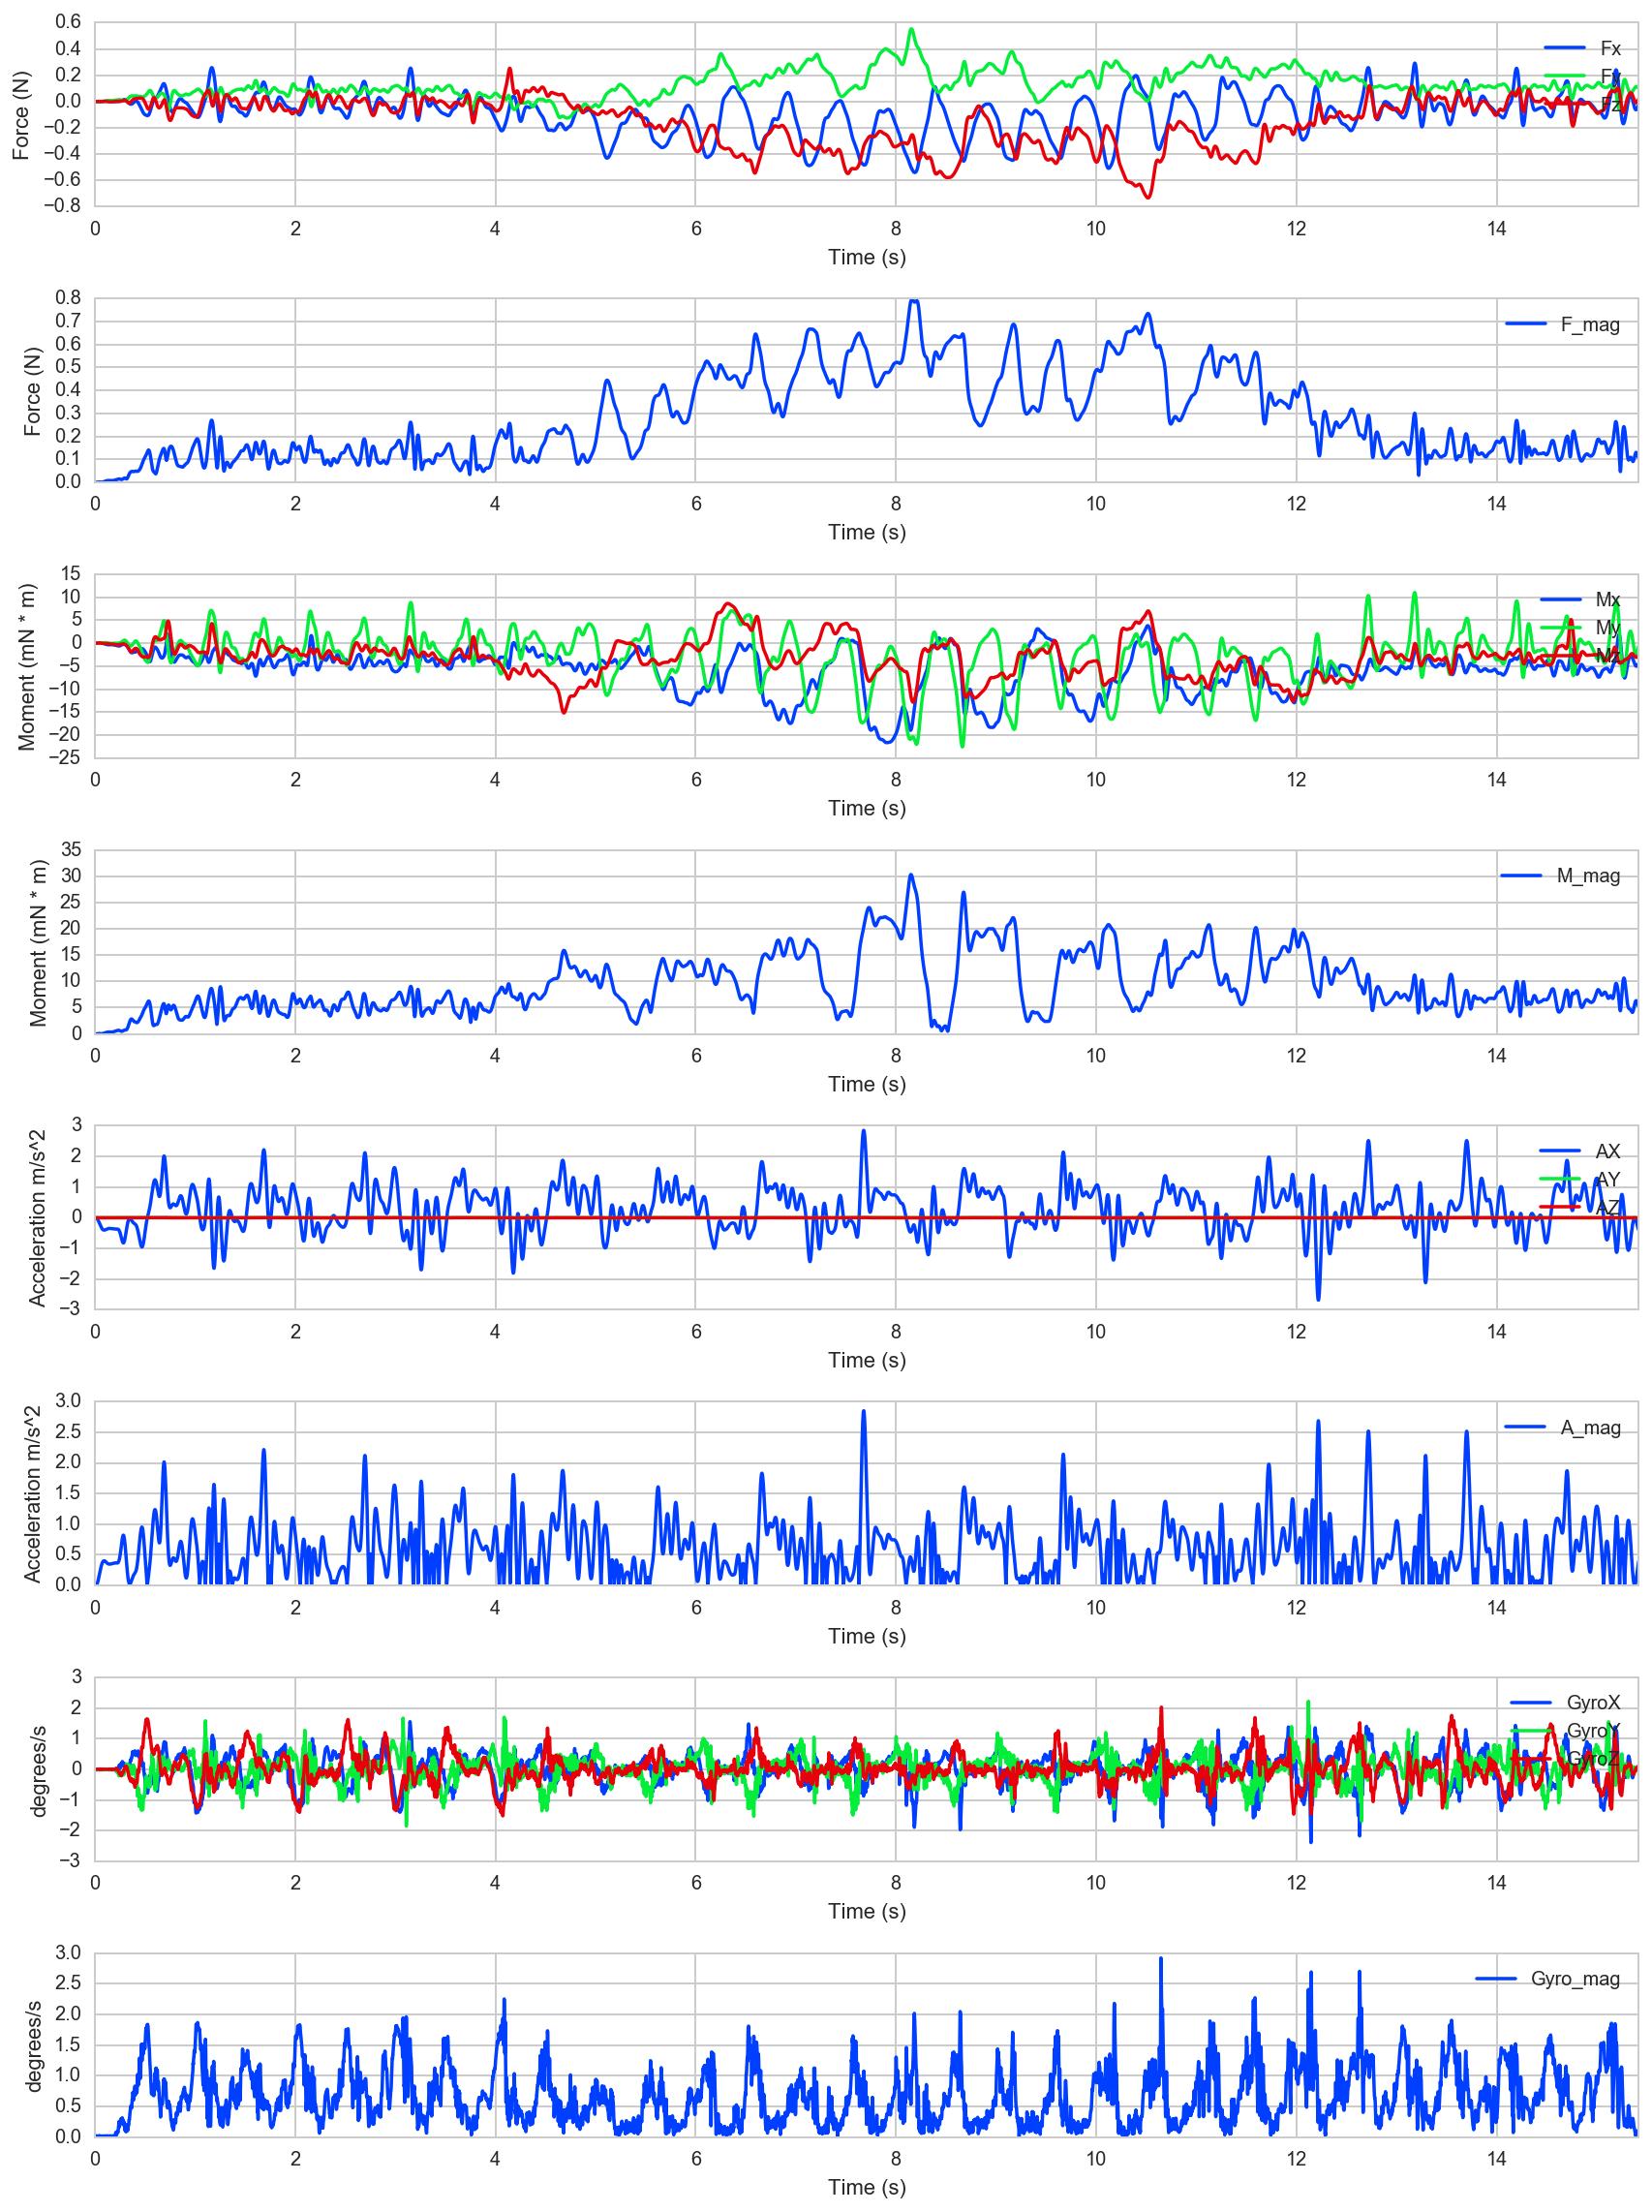

In [5]:
utils.plot_columns(df, [['Fx', 'Fy', 'Fz'], 'F_mag', ['Mx', 'My', 'Mz'], 'M_mag', ['AX', 'AY', 'AZ'], 'A_mag', ['GyroX', 'GyroY', 'GyroZ'], 'Gyro_mag'], display=True, save_figure=False)

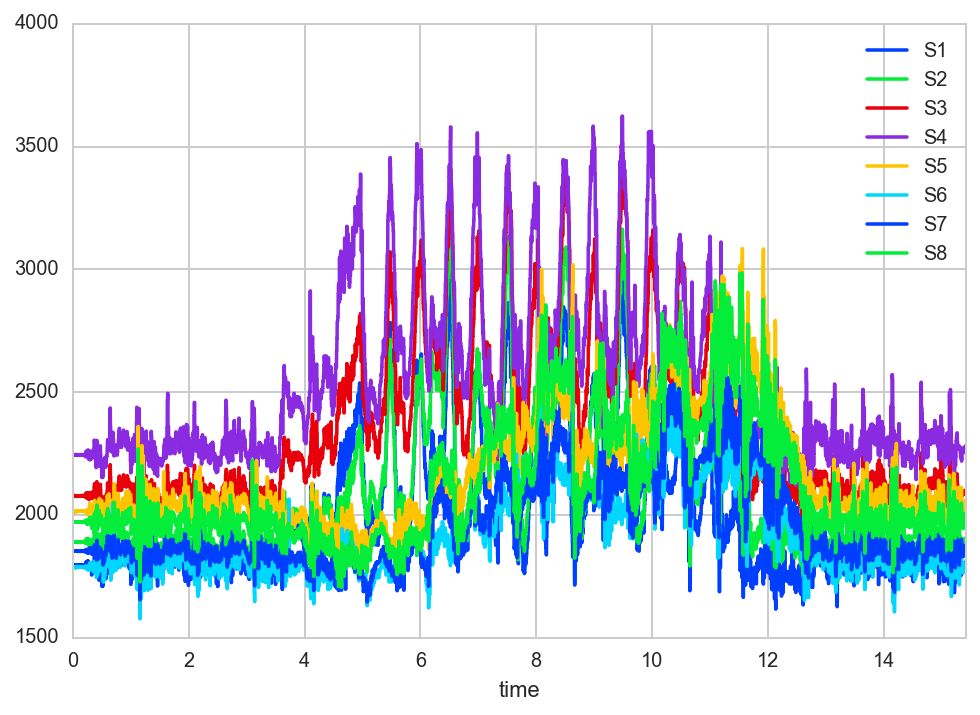

In [6]:
df.plot(x='time', y=['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8'])

In [7]:
print "Here is the cost of transport for inside flaps"
cot = utils.cost_of_transport_inside_flaps(df, has_bottom_shell=False, v_avg=4.572/100.,
                                           start_time=5000, end_time=11000, same_power_across_experiments=0)
print cot


Here is the cost of transport for inside flaps
power:1.81435570449
55.2066713688


In [8]:
drag = utils.calculate_drag_energy(df, has_bottom_shell=False,start_time=5000,end_time=11000)
print drag

drag energy (kg*cm^2/s^2): 460.396065548
0.0460396065548


In [14]:
import numpy as np
start = df['Right Leg Pos'][6500:7500].argmax()
end = df['Right Leg Pos'][11500:12500].argmax()
print start, end
print df['Right Leg Pos'][start]
print df['Right Leg Pos'][end]
starts = np.arange(start, end, step=1000)
ends = np.arange(start+1000, end+1000, step=1000)
intervals = np.vstack((starts, ends)).T
print intervals

6971 11957
6.28241866412
6.27628298902
[[ 6971  7971]
 [ 7971  8971]
 [ 8971  9971]
 [ 9971 10971]
 [10971 11971]]


In [15]:
cots = utils.get_cost_of_transport_from_list(df,False,v_avg=4.572/100.,intervals=intervals)
print cots

power:1.90129382711
power:1.86684939168
power:1.80694478004
power:1.78741285309
power:1.62092266635
[57.851998496702073, 56.803933543015859, 54.981173981592235, 54.386862364642077, 49.320948882055824]
